In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import json
from datetime import datetime
import cv2

In [4]:
str(datetime.now()).replace(' ', '_')

'2018-08-07_17:14:46.548124'

In [41]:
print(240 * 1.5)
print(320 * 1.5)

360.0
480.0


In [6]:
# Load data (deserialize)
with open('test_data.pickle', 'rb') as handle:
    d_bag = pickle.load(handle, encoding='latin1')

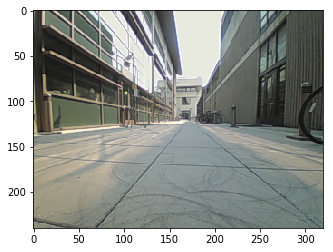

In [7]:
plt.imshow(d_bag['/image_raw'][0])
plt.show()

In [8]:
# del d_bag['/image_raw']

In [9]:
current_time = 0.1
data_to_send = {topic : d_bag[topic][max(0, int((current_time / 52.0) * len(d_bag[topic])) - 1)] for topic in d_bag.keys()}
data_to_send['/image_raw'] = data_to_send['/image_raw'].tolist()

In [10]:
data = json.loads(json.dumps(data_to_send))

In [11]:
list(data.keys())

['/wifi_connected',
 '/collision/flipped',
 '/image_raw',
 '/collision/any',
 '/camera_info',
 '/status',
 '/joint_states',
 '/imu/data',
 '/odometry/filtered',
 '/navsat/fix',
 '/navsat/time_reference',
 '/collision/close',
 '/cmd_drive',
 '/imu_um7/temperature',
 '/diagnostics',
 '/navsat/vel',
 '/diagnostics_agg',
 '/collision/stuck',
 '/cmd_vel',
 '/feedback']

In [12]:
data['/diagnostics_agg']['status'][0]['name'] == '/Jackal Base/General'

True

In [13]:
data['/diagnostics_agg']['status'][0]['values'][0]

{'key': 'jackal_node: Battery', 'value': 'Battery OK.'}

In [14]:
data['/odometry/filtered']['twist']['twist']

{'angular': {'x': 0.0002545872379922077,
  'y': -0.0004473871780211876,
  'z': -0.005939636798905999},
 'linear': {'x': -7.470277811877425e-10, 'y': 0.0, 'z': 0.0}}

In [15]:
data['/cmd_vel']

{'angular': {'x': 0.0, 'y': 0.0, 'z': -0.0},
 'linear': {'x': -0.0, 'y': 0.0, 'z': 0.0}}

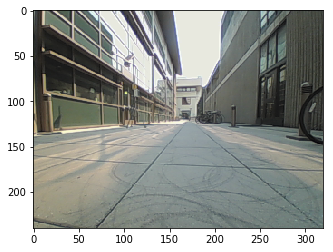

In [16]:
plt.imshow(np.array(data['/image_raw'], dtype='uint8'))
plt.show()

In [28]:
test_image = np.array(data['/image_raw'], dtype='uint8')

In [29]:
np.zeros((240, 320, 3)).shape

(240, 320, 3)

In [33]:
plt.imsave('static/name.png', test_image)

In [38]:
test_image_resized = cv2.resize(test_image, (640, 480))

In [39]:
plt.imsave('static/name_resized.png', test_image_resized)

In [40]:
test_image_resized.shape

(480, 640, 3)